# Neopythen: potential map bases on Ellenberg(1)  




(1) https://www.researchgate.net/publication/235710596_Zeigwerte_von_Pflanzen_in_MittelEuropa

Check ellenberg numbers:

In [44]:
# READ ELLENBERG LEGEND
import pandas as pd
ellenberg_csv = r'N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\neophytes_ellenberg.csv'
df = pd.read_csv(ellenberg_csv,encoding="ISO-8859-1")
#print(df.to_string()) 



Constrution of datacube with 10m raster files which can be used to calculate the Ellenbergnumbers:




## (1) Reading dims

In [45]:
# Reading libaries:

import os
from pathlib import Path, WindowsPath
from glob import glob
from pathlib import Path
import geopandas as gpd

from pathlib import Path
import geopandas as gpd
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors



import rasterio
import rasterio.mask
import numpy as np
import subprocess
import pandas as pd
import xarray as xr
import rioxarray as rxr


print("job done")

job done


## (2) Building cube

In [46]:
## reading raster from CWS:

##  base folder on CWS:
base_path = WindowsPath('N:/C2205_FAIRiCUBE/f02_data/d060_data_LUXEMBOURG/f01_Lux_neopyhtes/f02_luxembourg_data/f02_raster_10m_collection/ellenberg')

# 1	Lichtzahl (L-Zahl)
# 2	Feuchtezahl (F-Zahl)
# 3	Temperaturzahl (T-Zahl)
# 4	Kontinentalitätszahl (K-Zahl)
# 5	Reaktionszahl (R-Zahl)
# 6	Stickstoffzahl (N-Zahl)
# 7	Salzzahl (S-Zahl)
# 8	Schwermetallresistenz
# 9	Lebensform
# 10 Blattausdauer

## AOI
#--------------------------
#min_x = 3316000 
#max_x = 3345000

#max_y = 1780000
#min_y = 1799000 
#--------------------------

## Datasets 01 Lichtzahl:-------------------------------------------
d01_L_parameter = os.path.join(base_path, 'shadow_2019_10m_b1.tif')
print(d01_L_parameter)
# Open the file:
cube_01_L = rxr.open_rasterio(d01_L_parameter)
cube_01_L = cube_01_L.to_dataset(name='d01_L_light')

### Dataset 02 Feuchtezahl :-------------------------------------------
d02_F_parameter = os.path.join(base_path, 'twi_2019_10m_b1.tif')
print(d02_F_parameter)
# Open the file:
cube_02_F = rxr.open_rasterio(d02_F_parameter)
cube_02_F = cube_02_F.to_dataset(name='d02_F_wetness')

### Dataset 03 Temperatur:-----------------------------------------------------------------------------------------------------------S

### monthly temp for 2017
# Open the file:


d03_T_parameter_2017 = os.path.join(base_path, 'air_temperature_2017_month_mean_10m_b12.tif')
cube_03_T = rxr.open_rasterio(d03_T_parameter_2017)
cube_03_T = cube_03_T.to_dataset(name='d03_T_temperatur')
cube_03_T
#print(d03_T_parameter_2017)
## Open the file:
cube_03_T_stacked = xr.concat([cube_03_T.sel(band=i) for i in range(1, 13)], dim='month')
##print(cube_03_T_stacked)
###Celsius = Kelvin - 273.15
## Calculate the maximum across all bands
max_across_month = cube_03_T_stacked.max(dim='month')- 273.15
max_across_month = max_across_month.rename({'d03_T_temperatur': 'd03_T_max_temperatur_2017_celsius'})
## Calculate the min across all bands
min_across_month = cube_03_T_stacked.min(dim='month')- 273.15
min_across_month = min_across_month.rename({'d03_T_temperatur': 'd03_T_min_temperatur_2017_celsius'})
## Calculate the avg across all bands
avg_across_month = cube_03_T_stacked.mean(dim='month')- 273.15
avg_across_month = avg_across_month.rename({'d03_T_temperatur': 'd03_T_avg_temperatur_2017_celsius'})
### Merge three temperature min-max-avg datasets:
cube_03_temperature_2017 = xr.merge([max_across_month, min_across_month, avg_across_month])
#cube_03_temperature_2017

### Dataset 03 Temperatur:-----------------------------------------------------------------------------------------------------------E




### Dataset 04 Kontinentaliätzahl:-------------------------------------------
d04_K_parameter = os.path.join(base_path, 'air_temperature_2017_month_mean_10m_b12.tif')
print(d04_K_parameter)
# Open the file:
cube_04_K = rxr.open_rasterio(d04_K_parameter)
cube_04_K = cube_04_K.to_dataset(name='d04_K_continentality')

### Dataset 05 Reaktionszahl (ph):-------------------------------------------
d05_R_parameter = os.path.join(base_path, 'pH_CaCl_10m_b1.tif')
print(d05_R_parameter)
# Open the file:
cube_05_R = rxr.open_rasterio(d05_R_parameter)
cube_05_R = cube_05_R.to_dataset(name='d05_R_ph')

## ### Dataset 06 Stickstoff:-------------------------------------------
d06_N_parameter = os.path.join(base_path, 'soil_nitrat_10m_b1.tif')
print(d06_N_parameter)
## # Open the file:
cube_06_N = rxr.open_rasterio(d06_N_parameter)
cube_06_N = cube_06_N.to_dataset(name='d06_N_nitrogen')## 

## ### Dataset 07 Salz:------------------------------------------- NO DATA ()
## d07_S_parameter = os.path.join(base_path, 'xxx.tif')
## print(d07_S_parameter)
## # Open the file:
## cube_07_S = rxr.open_rasterio(d07_S_parameter)
## cube_07_S = cube_07_S.to_dataset(name='d07_S_salt')## 

## ### Dataset 08 Schwermetall:-------------------------------------------  NO DATA ()
## d08_HM_parameter = os.path.join(base_path, 'xxx.tif')
## print(d08_HM_parameter)
## # Open the file:
## cube_08_HM = rxr.open_rasterio(d08_HM_parameter)
## cube_08_HM = cube_08_HM.to_dataset(name='d08_HM_heavy_metal')

### Dataset 09 Lebensform:-------------------------------------------
d09_watersurface_raster = os.path.join(base_path, 'land_cover_2021_10m_b1.tif')
cube_09__temp_LF = rxr.open_rasterio(d09_watersurface_raster)
#print(cube_09__temp_LF)
cube_09__temp_LF = cube_09__temp_LF.to_dataset(name='d09_LV_landcover')

# -- landcover_code	landcover_name
# -- 10	buildings
# -- 20	other constructed areas
# -- 30	bare soil
# -- 60	water
# -- 70	trees
# -- 71	dead trees
# -- 80	bushes
# -- 91	permanent herbaceous vegetation
# -- 92	seasonal herbaceous vegetation
# -- 93	vineyards


ds = cube_09__temp_LF
d09_LF_parameter_temp_water_area =    xr.where(ds['d09_LV_landcover'] == 60, 1, 0) # Else set to 0
# Adding the result back to the dataset (optional)
cube_09__temp_LF['ellenberg_water_area'] = d09_LF_parameter_temp_water_area

cube_09_LF_x = cube_09__temp_LF['ellenberg_water_area'] 
cube_09_1_LF_water = cube_09_LF_x.to_dataset(name='ellenberg_water_area')
#cube_09_LF_water

d09_LF_parameter_temp_not_sealed =    xr.where(ds['d09_LV_landcover'].isin ([30,70,71,80,91,92,93]), 1, 0) # Else set to 0
# Adding the result back to the dataset (optional)
cube_09__temp_LF['ellenberg_not_sealed_area'] = d09_LF_parameter_temp_not_sealed
cube_09_LF_x_non_sealed = cube_09__temp_LF['ellenberg_not_sealed_area'] 
cube_09_2_LF_non_sealed = cube_09_LF_x_non_sealed.to_dataset(name='ellenberg_not_sealed_area')
#cube_09_LF_non_sealed



print ("job done-------------------------------")



N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\shadow_2019_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\twi_2019_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\air_temperature_2017_month_mean_10m_b12.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\pH_CaCl_10m_b1.tif
N:\C2205_FAIRiCUBE\f02_data\d060_data_LUXEMBOURG\f01_Lux_neopyhtes\f02_luxembourg_data\f02_raster_10m_collection\ellenberg\soil_nitrat_10m_b1.tif
job done-------------------------------


Translation raster values into "Ellenberg categories":

### (2.1) Translation raster values into "Ellenberg categories":
1	Lichtzahl (L-Zahl)
2	Feuchtezahl (F-Zahl)
3	Temperaturzahl (T-Zahl)
4	Kontinentalitätszahl (K-Zahl)
5	Reaktionszahl (R-Zahl)
6	Stickstoffzahl (N-Zahl)
7	Salzzahl (S-Zahl)
8	Schwermetallresistenz
9	Lebensform
10	Blattausdauer


#### (2.1.1) Lichtzahl (L-Zahl)

- ziffer	code_ziff	ziffer_info
- 1	    L-1	    Tiefschattenpflanze, noch bei weniger als 1 %, selten bei mehr als 30 % r. B. vorkommend
- 2	    L-2	    zwischen 1 und 3 stehend
- 3	    L-3	    Schattenpflanze, meist bei weniger als 5 % r. B., doch auch an helleren Stellen
- 4	    L-4	    zwischen 3 und 5 stehend
- 5	    L-5	    Halbschattenpflanze, nur ausnahmsweise im vollen Licht, meist aber bei mehr als 10 % r. B.
- 6	    L-6	    zwischen 5 und 7 stehend; selten bei weniger als 20 % r. B.
- 7	    L-7	    Halblichtpflanze, meist bei vollem Licht, aber auch im Schatten bis etwa 30 % r. B.
- 8	    L-8	    Lichtpflanze, nur ausnahmsweise bei weniger als 40 % r. B.
- 9	    L-9	    Volllichtpflanze, nur an voll bestrahlten Plätzen, nicht bei weniger als 50 % r. B.


Max value: 0.9887685775756836
Min value: 0.0013677332317456603
Mean value: 0.4048382043838501
Standard deviation: 0.2618250250816345
25th percentile (Q1): 0.11034500598907471
50th percentile (Median): 0.43184663355350494
75th percentile (Q3): 0.640671968460083
<xarray.Dataset>
Dimensions:                 (band: 1, x: 972, y: 1044)
Coordinates:
  * band                    (band) int32 1
  * x                       (x) float64 7.286e+04 7.286e+04 ... 8.256e+04
  * y                       (y) float64 8.002e+04 8.002e+04 ... 6.96e+04
    spatial_ref             int32 0
Data variables:
    d01_L_light             (band, y, x) float32 0.5026 0.5072 ... 0.5443 0.5879
    ellenberg_light_number  (band, y, x) int32 4 4 3 4 5 5 3 5 ... 2 4 4 4 3 4 4


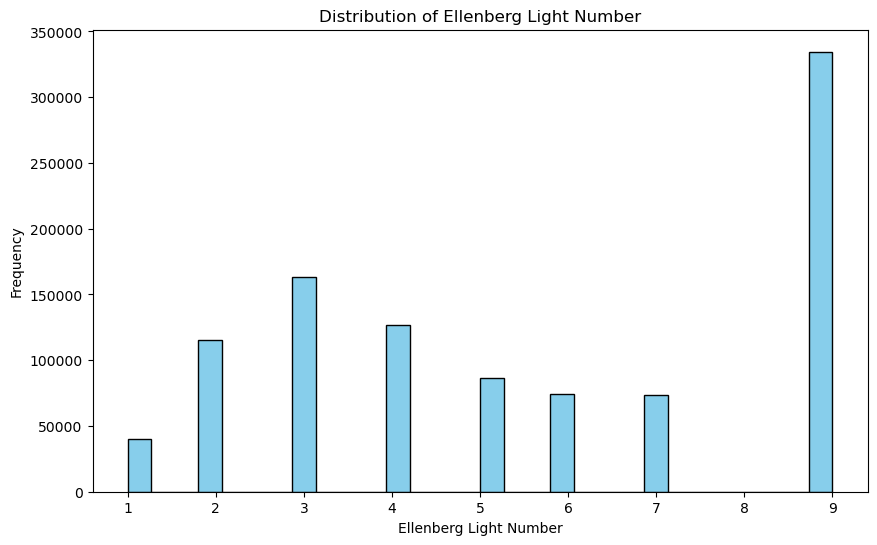

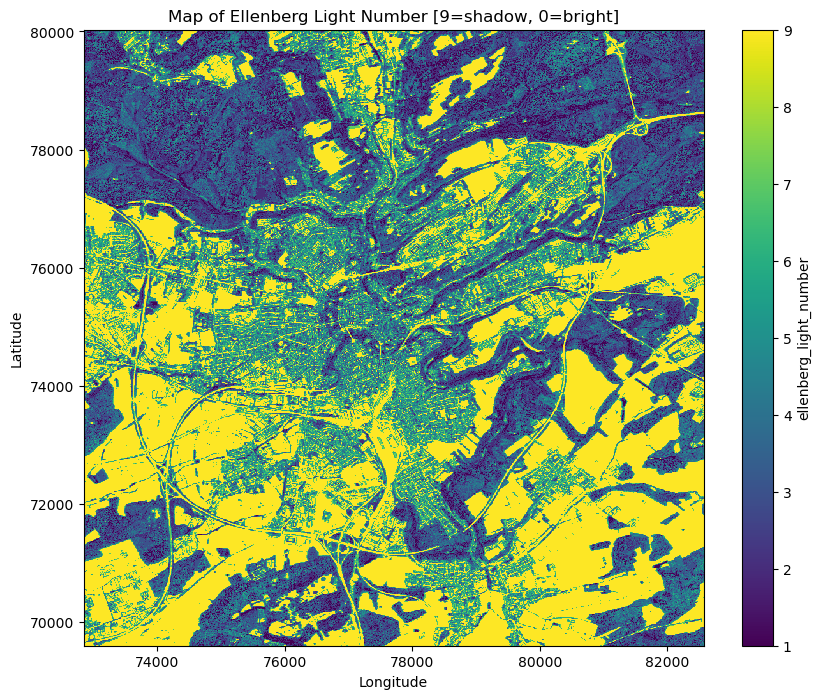

In [47]:
## Updaten Ellenberg values

# get statistics from raster band:

ds = cube_01_L
light_number = ds.d01_L_light.sel(band=1)

# Compute statistics
max_value = light_number.max().item()    # Maximum
min_value = light_number.min().item()    # Minimum
mean_value = light_number.mean().item()  # Mean
std_value = light_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = light_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")

#######################################

# Applying the if-then query  0=light 1= dark raster pixel values
# Manualy classification of shadow values into ellenberg light-classes:
ds = cube_01_L
new_data =          xr.where(ds['d01_L_light'] > 0.9, 1,  #
                    xr.where(ds['d01_L_light'] > 0.8, 1,  #
                    xr.where(ds['d01_L_light'] > 0.7, 2,  #
                    xr.where(ds['d01_L_light'] > 0.6, 3,  #
                    xr.where(ds['d01_L_light'] > 0.5, 4,  #
                    xr.where(ds['d01_L_light'] > 0.4, 5,  #
                    xr.where(ds['d01_L_light'] > 0.3, 6,  #       
                    xr.where(ds['d01_L_light'] > 0.2, 7,  #
                    xr.where(ds['d01_L_light'] > 0.1, 9,  #
                    xr.where(ds['d01_L_light']  > 0, 9,  #
                             0)))))))))) # Else set to 0


# Adding the result back to the dataset (optional)
cube_01_L['ellenberg_light_number'] = new_data
print (cube_01_L)


## Plot results:
# Flatten the data array (remove NaNs if necessary)
light_data = cube_01_L['ellenberg_light_number'].values.flatten()
# Remove NaN values if they exist
light_data = light_data[~np.isnan(light_data)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(light_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ellenberg Light Number')
plt.xlabel('Ellenberg Light Number')
plt.ylabel('Frequency')
# Show the plot
plt.show()


# MAP DATA
cube_01_L['ellenberg_light_number'] 

# Plot the ellenberg_light_number data from cube_01_L
plt.figure(figsize=(10, 8))
cube_01_L['ellenberg_light_number'].plot(cmap='viridis')  # You can change the colormap if needed

# Add title and labels
plt.title('Map of Ellenberg Light Number [9=shadow, 0=bright]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


#### (2.1.2) Feuchtezahl (F-Zahl)

- ziffer	code_ziff	ziffer_info
- 1	 F-1	        Starktrockniszeiger, an oftmals austrocknenden Stellen lebensfähig und auf trockene Böden beschränkt
- 2	 F-2	        zwischen 1 und 3 stehend
- 3	 F-3	        auf feuchten Böden fehlend
- 4	 F-4	        zwischen 3 und 5 stehend
- 5	 F-5	        Frischezeiger, Schwerpunkt auf mittelfeuchten Böden, auf nassen sowie auf öfter austrocknenden Böden fehlend
- 6	 F-6	        zwischen 5 und 7 stehend
- 7	 F-7	        Feuchtezeiger, Schwerpunkt auf gut durchfeuchteten, aber nicht nassen Böden
- 8	 F-8	        zwischen 7 und 9 stehend
- 9	 F-9	        Nässezeiger, Schwerpunkt auf oft durchnässten (luftarmen) Böden
- 10	 F-10	        Wasserpflanze, die längere Zeiten auch ohne Wasserbedeckung des Bodens überlebt
- 11	 F-11	        Wasserpflanze, die unter Wasser wurzelt, aber zumindest zeitweilig mit Blättern über dessen Oberfläche aufragt, ..
- 12	 F-12	        Unterwasserpflanze, ständig oder fast dauernd untergetaucht


In [48]:
cube_02_F 

<xarray.Dataset>
Dimensions:        (band: 1, x: 972, y: 1044)
Coordinates:
  * band           (band) int32 1
  * x              (x) float64 7.286e+04 7.286e+04 ... 8.256e+04 8.256e+04
  * y              (y) float64 8.002e+04 8.002e+04 8e+04 ... 6.96e+04 6.96e+04
    spatial_ref    int32 0
Data variables:
    d02_F_wetness  (band, y, x) float32 ...

Max value: 0.5655166506767273
Min value: 0.10185924917459488
Mean value: 0.21759621798992157
Standard deviation: 0.05478206276893616
25th percentile (Q1): 0.19416487589478493
50th percentile (Median): 0.20510729402303696
75th percentile (Q3): 0.21778062358498573
new statistics:
Max value: 1.0
Min value: 0.0
Mean value: 0.24961739778518677
Standard deviation: 0.11816254258155823


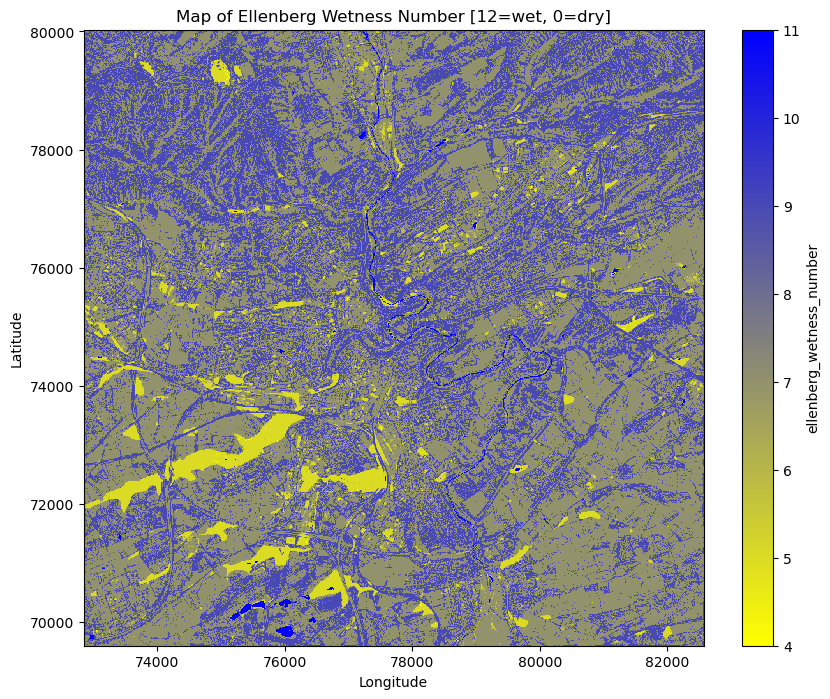

In [49]:
## Updaten Ellenberg values   # 1 = wet rasster values 0 = dry
import numpy as np
# get statistics from raster band:


ds  = cube_02_F 
ds_2= cube_09_1_LF_water   # for water species - surface water is needed

## Merge datasets:
wetness_cube = xr.merge([ds, ds_2 ])


wetness_number = ds.d02_F_wetness.sel(band=1)

# Compute statistics
max_value = wetness_number.max().item()    # Maximum
min_value = wetness_number.min().item()    # Minimum
mean_value = wetness_number.mean().item()  # Mean
std_value = wetness_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = wetness_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")




## the data should be scaled from 0-1: 

# option A (linear)
# Calculate the minimum and maximum values of the data
min_value = wetness_number.min().values
max_value = wetness_number.max().values
# Perform the linear stretch (normalization)
wetness_number_linear = (wetness_number - min_value) / (max_value - min_value)

# option B (by percnetile)
# Define lower and upper percentiles (e.g., 2nd and 98th percentiles)
#p_low, p_high = 2, 98
#
## Compute the values at the specified percentiles
#
## Assuming light_number is a NumPy array or xarray DataArray
#light_number = ds.d04_wetness_number.sel(band=1).values  # Extract as a NumPy array
#
## Define the number of parts (in this case, 10)
#num_parts = 10
#
## Compute the bin edges for dividing the data into 10 equal parts (deciles)
#bin_edges = np.percentile(light_number, np.linspace(0, 100, num_parts + 1))
#
## Use np.digitize to assign each value to a bin (1 to 10)
#light_number_binned = np.digitize(light_number, bins=bin_edges, right=True)



wetness_number = wetness_number_linear

print ("new statistics:")
# Compute statistics
max_value = wetness_number.max().item()    # Maximum
min_value = wetness_number.min().item()    # Minimum
mean_value = wetness_number.mean().item()  # Mean
std_value = wetness_number.std().item()    # Standard deviation
# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

#######################################


# Manualy classification of shadow values into ellenberg wetness classes:
ds = cube_02_F 
new_data =          xr.where(ds['d02_F_wetness'] > 0.9, 1,  #
                    xr.where(ds['d02_F_wetness'] > 0.8, 1,  #
                    xr.where(ds['d02_F_wetness'] > 0.7, 2,  #
                    xr.where(ds['d02_F_wetness'] > 0.6, 3,  #
                    xr.where(ds['d02_F_wetness'] > 0.5, 4,  #
                    xr.where(ds['d02_F_wetness'] > 0.4, 5,  #
                    xr.where(ds['d02_F_wetness'] > 0.3, 6,  #       
                    xr.where(ds['d02_F_wetness'] > 0.2, 7,  #
                    xr.where(ds['d02_F_wetness'] > 0.1, 9,  #
                    xr.where(ds['d02_F_wetness']  > 0, 9,  #
                             0)))))))))) # Else set to 0


# Adding the result back to the dataset (optional)
cube_02_F ['ellenberg_wetness_number'] = new_data
#print (cube_02_F )

## Merge datasets:
wetness_cube_3band = xr.merge([wetness_cube, cube_02_F ])

## 11 and 12 - if land cover = water surface
# Update ellenberg_wetness_number where ellenberg_water_area equals 60
wetness_cube_3band['ellenberg_wetness_number'] = xr.where(
                                wetness_cube_3band['ellenberg_water_area'] == 1,  # Condition: where water area then ellenberg numer is 11 (or 12)
                                11,  # Set ellenberg_wetness_number to 11
                                wetness_cube_3band['ellenberg_wetness_number']  # Else, keep the original value
                            )




# MAP DATA
wetness_cube_3band['ellenberg_wetness_number']


# Create a colormap that transitions smoothly from  yellow to blue
cmap = mcolors.LinearSegmentedColormap.from_list("blue_yellow", ["yellow", "blue"])

# Define the color boundaries; this sets the transition between colors
norm = mcolors.BoundaryNorm(boundaries=[0, 1, wetness_cube_3band['ellenberg_wetness_number'].max()], ncolors=2)


plt.figure(figsize=(10, 8))
wetness_cube_3band['ellenberg_wetness_number'].plot(cmap=cmap)

# Add title and labels
plt.title('Map of Ellenberg Wetness Number [12=wet, 0=dry]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()







#### (2.1.3) Temperaturzahl (T-Zahl)

- Wert	Benennung	Erläuterung
- 1	Kältezeiger	nur in hohen Gebirgslagen, d. h. der alpinen und nivalen Stufe
- 2	Kälte- bis Kühlezeiger	zwischen 1 und 3 stehend (viele alpine Arten)
- 3	Kühlezeiger	vorwiegend in subalpinen Lagen
- 4	Kühle- bis Mäßigwärmezeiger	zwischen 3 und 5 stehend (v. a. hochmontane und montane Arten)
- 5	Mäßigwärmezeiger	in tiefen bis in montanen Lagen vorkommend (Schwergewicht in submontan-temperaten Bereichen)
- 6	Mäßigwärme- bis Wärmezeiger	zwischen 5 und 7 stehend (planar bis collin)
- 7	Wärmezeiger	im nördlichen Mitteleuropa nur in relativ warmen Tieflagen
- 8	Wärme- bis Extremwärmezeiger	zwischen 7 und 9 stehend (meist mit submediterranem Schwergewicht)
- 9	extremer Wärmezeiger	mediterran (in Mitteleuropa nur auf wärmsten Plätzen, z. B. im Oberrheingebiet)

For Luxembourg only number >5:

- Wert	Benennung	Erläuterung
- x1	Kältezeiger	nur in hohen Gebirgslagen, d. h. der alpinen und nivalen Stufe
- x2	Kälte- bis Kühlezeiger	zwischen 1 und 3 stehend (viele alpine Arten)
- x3	Kühlezeiger	vorwiegend in subalpinen Lagen
- x4	Kühle- bis Mäßigwärmezeiger	zwischen 3 und 5 stehend (v. a. hochmontane und montane Arten)
- x5	Mäßigwärmezeiger	in tiefen bis in montanen Lagen vorkommend (Schwergewicht in submontan-temperaten Bereichen)
- 6	Mäßigwärme- bis Wärmezeiger	zwischen 5 und 7 stehend (planar bis collin)
- 7	Wärmezeiger	im nördlichen Mitteleuropa nur in relativ warmen Tieflagen
- 8	Wärme- bis Extremwärmezeiger	zwischen 7 und 9 stehend (meist mit submediterranem Schwergewicht)
- 9	extremer Wärmezeiger	mediterran (in Mitteleuropa nur auf wärmsten Plätzen, z. B. im Oberrheingebiet)


In [50]:
cube_03_temperature_2017

<xarray.Dataset>
Dimensions:                            (x: 970, y: 1040)
Coordinates:
  * x                                  (x) float64 7.286e+04 ... 8.254e+04
  * y                                  (y) float64 8.002e+04 ... 6.964e+04
    spatial_ref                        int32 0
Data variables:
    d03_T_max_temperatur_2017_celsius  (y, x) float32 17.64 17.64 ... 17.76
    d03_T_min_temperatur_2017_celsius  (y, x) float32 -3.184 -3.184 ... -3.028
    d03_T_avg_temperatur_2017_celsius  (y, x) float32 7.59 7.59 ... 7.726 7.726

Temperatur in Celsius  C°
Max value: 9.1456298828125
Min value: 6.04052734375
Mean value: 7.8159356117248535
Mean value [Celsius]: -265.3340643882751
Standard deviation: 0.6787370443344116
25th percentile (Q1): 7.356636047363281
50th percentile (Median): 7.8873443603515625
75th percentile (Q3): 8.345802307128906
<xarray.Dataset>
Dimensions:                            (x: 970, y: 1040)
Coordinates:
  * x                                  (x) float64 7.286e+04 ... 8.254e+04
  * y                                  (y) float64 8.002e+04 ... 6.964e+04
    spatial_ref                        int32 0
Data variables:
    d03_T_max_temperatur_2017_celsius  (y, x) float32 17.64 17.64 ... 17.76
    d03_T_min_temperatur_2017_celsius  (y, x) float32 -3.184 -3.184 ... -3.028
    d03_T_avg_temperatur_2017_celsius  (y, x) float32 7.59 7.59 ... 7.726 7.726
    ellenberg_temperatur_number        (y, x) int32 7 7 7 7 7 7 ... 7 7 7 7 7 7


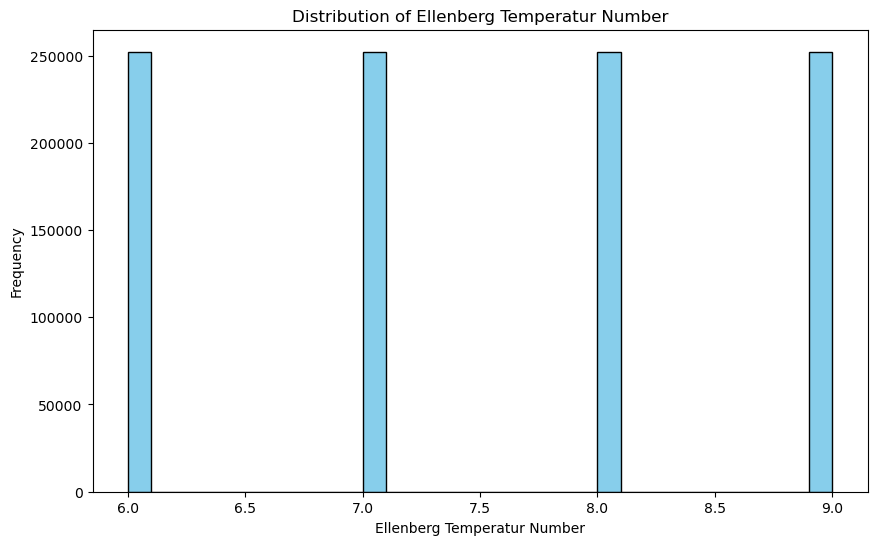

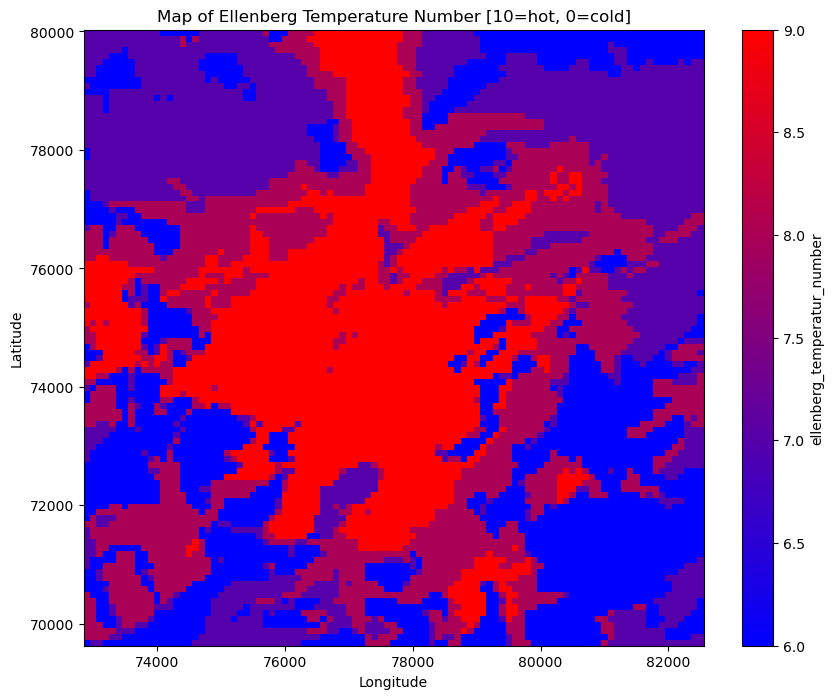

In [51]:
import numpy as np
# get statistics from raster band:
# Temperature number in KELVIN
ds = cube_03_temperature_2017["d03_T_avg_temperatur_2017_celsius"]

temp_number = ds


# Compute statistics
max_value = temp_number.max().item()    # Maximum
min_value = temp_number.min().item()    # Minimum
mean_value = temp_number.mean().item()  # Mean
std_value = temp_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = temp_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print ("Temperatur in Celsius  C°")
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Mean value [Celsius]: {mean_value- 273.15}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")


# Manualy classification of shadow values into ellenberg wetness classes:

ds = cube_03_temperature_2017
new_data =          xr.where(ds['d03_T_avg_temperatur_2017_celsius'] > quantile_75, 9,  #
                    xr.where(ds['d03_T_avg_temperatur_2017_celsius'] > quantile_50, 8,  #
                    xr.where(ds['d03_T_avg_temperatur_2017_celsius'] > quantile_25, 7,  #               
                             6))) # Else set to 0




# Adding the result back to the dataset (optional)
cube_03_temperature_2017 ['ellenberg_temperatur_number'] = new_data
print (cube_03_temperature_2017 )


## Plot tempe

# Flatten the data array (remove NaNs if necessary)
temp_data = cube_03_temperature_2017 ['ellenberg_temperatur_number'].values.flatten()
# Remove NaN values if they exist
temp_data = temp_data[~np.isnan(temp_data)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(temp_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ellenberg Temperatur Number')
plt.xlabel('Ellenberg Temperatur Number')
plt.ylabel('Frequency')
# Show the plot
plt.show()



# MAP DATA
cube_03_temperature_2017 ['ellenberg_temperatur_number']


# Create a colormap that transitions smoothly from  yellow to blue
cmap = mcolors.LinearSegmentedColormap.from_list("blue_yellow", ["blue", "red"])

# Define the color boundaries; this sets the transition between colors
norm = mcolors.BoundaryNorm(boundaries=[0, 1, cube_03_temperature_2017['ellenberg_temperatur_number'].max()], ncolors=2)


plt.figure(figsize=(10, 8))
cube_03_temperature_2017['ellenberg_temperatur_number'].plot(cmap=cmap)

# Add title and labels
plt.title('Map of Ellenberg Temperature Number [10=hot, 0=cold]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()

#### (2.1.4) Kontinentalitätszahl (K-Zahl)

- Wert	Benennung	Erläuterung
- 1	euozeanisch	in Mitteleuropa nur mit wenigen Vorkommen (süd- und westeuropäische Arten)
- 2	ozeanisch	Schwergewicht in Westeuropa und im westlichen Mitteleuropa
- 3	ozeanisch bis subozeanisch	zwischen 2 und 4 stehend (in großen Teilen Mitteleuropas vorkommend)
- 4	subozeanisch	Schwergewicht in Mitteleuropa, z. T. auch in Osteuropa
- 5	intermediär	schwach subozeanisch bis schwach subkontinental
- 6	subkontinental	Schwergewicht im östlichen Mitteleuropa und Osteuropa
- 7	subkontinental bis kontinental	zwischen 6 und 8 stehend
- 8	kontinental	nur an wenigen Standorten des östlichen Mitteleuropas vorkommend
- 9	eukontinental	im westlichen Mitteleuropa ganz fehlend, im östlichen selten (osteuropäische Arten

For Luxembourg:

Wert	Benennung	Erläuterung

- 2	ozeanisch	Schwergewicht in Westeuropa und im westlichen Mitteleuropa
- 3	ozeanisch bis subozeanisch	zwischen 2 und 4 stehend (in großen Teilen Mitteleuropas vorkommend)



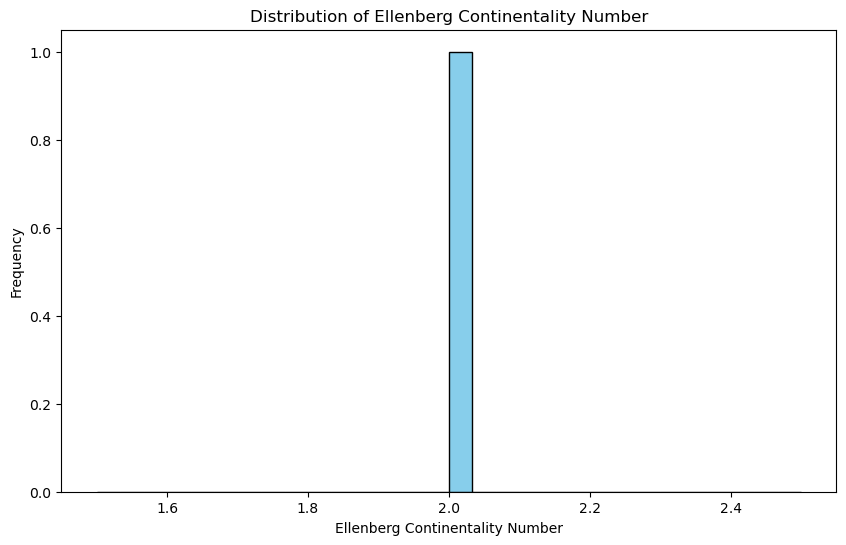

In [77]:
## K-number is for the Luxembourg city 2 (or 3):

ellenberg_temperatur_number = cube_03_temperature_2017['ellenberg_temperatur_number'].copy()
# Create a new dataset with just this variable
ellenberg_continentality_number = ellenberg_temperatur_number.to_dataset(name='ellenberg_continentality_number')

ellenberg_continentality_number['ellenberg_continentality_number'] = 2
# Print the new dataset to verify
ellenberg_continentality_number



## Plot tempe

# Flatten the data array (remove NaNs if necessary)
temp_data = ellenberg_continentality_number['ellenberg_continentality_number'].values.flatten()
# Remove NaN values if they exist
temp_data = temp_data[~np.isnan(temp_data)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(temp_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ellenberg Continentality Number')
plt.xlabel('Ellenberg Continentality Number')
plt.ylabel('Frequency')
# Show the plot
plt.show()


# map  plot not working..... please update script here:



In [78]:
ellenberg_continentality_number

<xarray.Dataset>
Dimensions:                          (x: 970, y: 1040)
Coordinates:
  * x                                (x) float64 7.286e+04 ... 8.254e+04
  * y                                (y) float64 8.002e+04 ... 6.964e+04
    spatial_ref                      int32 0
Data variables:
    ellenberg_continentality_number  int32 2

#### (2.1.5) Reaktionszahl (R-Zahl)
- Wert	Benennung	Erläuterung
- 1	Starksäurezeiger	nur auf sauren, nie auf nur schwach sauren bis alkalischen Böden vorkommend
- 2	Starksäure- bis Säurezeiger	zwischen 1 und 3 stehend
- 3	Säurezeiger	Schwergewicht auf sauren Böden, nur ausnahmsweise im neutralen Bereich
- 4	Säure- bis Mäßigsäurezeiger	zwischen 3 und 5 stehend
- 5	Mäßigsäurezeiger	auf stark sauren wie auf neutralen bis alkalischen Böden selten
- 6	Mäßigsäure- bis Schwachsäure-/Schwachbasenzeiger	zwischen 5 und 7 stehend
- 7	Schwachsäure- bis Schwachbasenzeiger	niemals auf stark sauren Böden
- 8	Schwachsäure-/Schwachbasen- bis Basen- und Kalkzeiger	zwischen 7 und 9 stehend, d. h. meist auf Kalk weisend
- 9	Basen- und Kalkzeiger	stets auf kalkreichen Böden

For Luxembourg:


- Wert	Benennung	Erläuterung
- 3	Säurezeiger	Schwergewicht auf sauren Böden, nur ausnahmsweise im neutralen Bereich
- 4	Säure- bis Mäßigsäurezeiger	zwischen 3 und 5 stehend
- 5	Mäßigsäurezeiger	auf stark sauren wie auf neutralen bis alkalischen Böden selten
- 6	Mäßigsäure- bis Schwachsäure-/Schwachbasenzeiger	zwischen 5 und 7 stehend
- 7	Schwachsäure- bis Schwachbasenzeiger	niemals auf stark sauren Böden
- 8	Schwachsäure-/Schwachbasen- bis Basen- und Kalkzeiger	zwischen 7 und 9 stehend, d. h. meist auf Kalk weisend
- 9	Basen- und Kalkzeiger	stets auf kalkreichen Böden

In [80]:
cube_05_R

<xarray.Dataset>
Dimensions:      (band: 1, x: 970, y: 1040)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 7.28e+04 7.28e+04 7.282e+04 ... 8.248e+04 8.248e+04
  * y            (y) float64 8.004e+04 8.004e+04 ... 6.966e+04 6.966e+04
    spatial_ref  int32 0
Data variables:
    d05_R_ph     (band, y, x) float32 ...

Max value: 6.280585765838623
Min value: 4.5246357917785645
Mean value: 5.504148006439209
Standard deviation: 0.34741243720054626
25th percentile (Q1): 5.278554439544678
50th percentile (Median): 5.548440933227539
75th percentile (Q3): 5.748065948486328


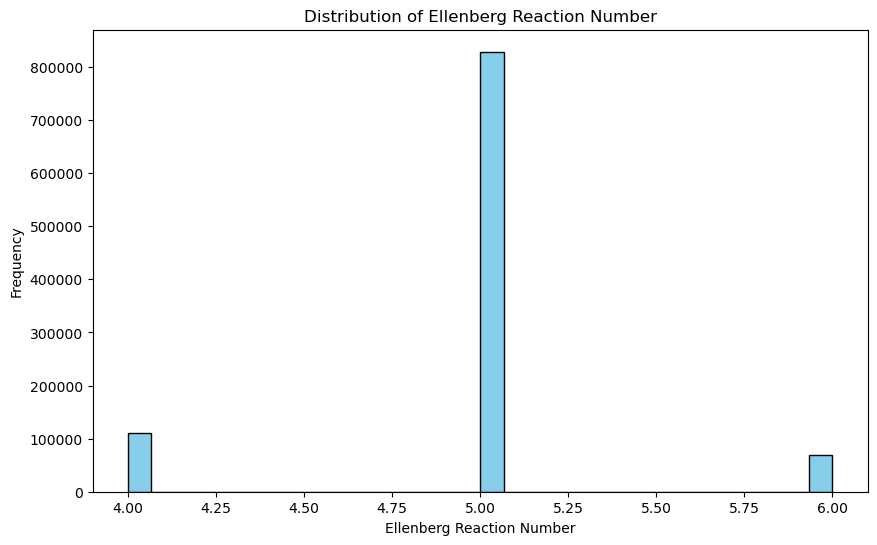

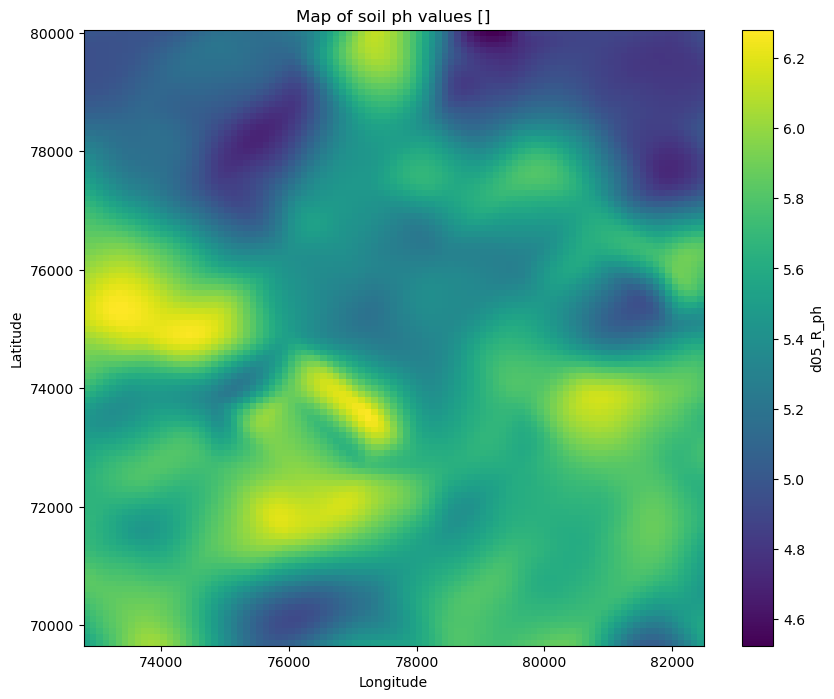

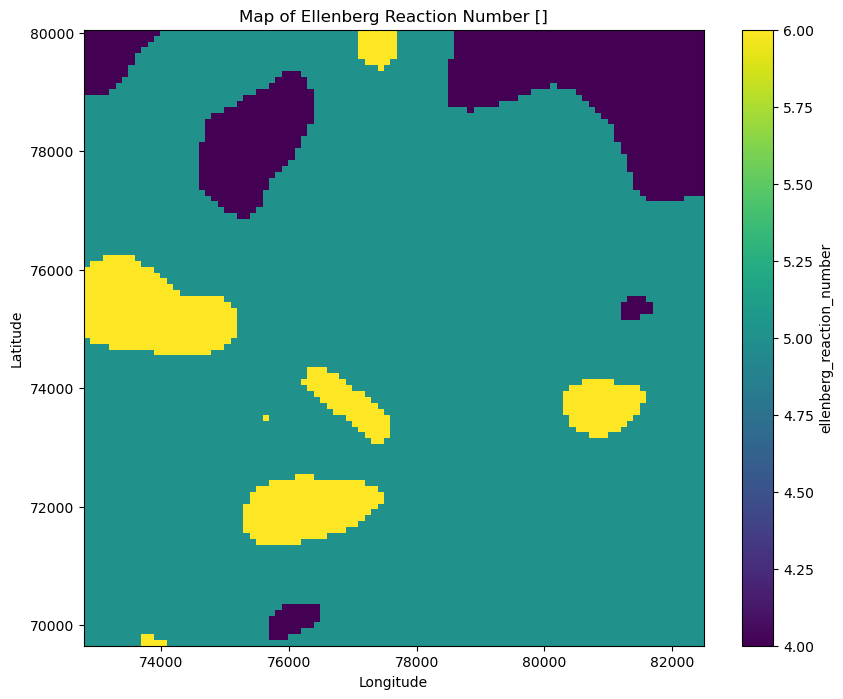

In [91]:
## Updaten Ellenberg values

# nitrogen value (ph)

ds = cube_05_R
nitrogen_number = ds.d05_R_ph.sel(band=1)

# Compute statistics
max_value = nitrogen_number.max().item()    # Maximum
min_value = nitrogen_number.min().item()    # Minimum
mean_value = nitrogen_number.mean().item()  # Mean
std_value = nitrogen_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = nitrogen_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")

#######################################

# Applying the if-then query  0=light 1= dark raster pixel values
# Manualy classification of shadow values into ellenberg light-classes:

new_data =          xr.where(ds['d05_R_ph'] > 9, 9,  #
                    xr.where(ds['d05_R_ph'] > 8, 8,  #
                    xr.where(ds['d05_R_ph'] > 7, 7,  #
                    xr.where(ds['d05_R_ph'] > 6, 6,  #
                    xr.where(ds['d05_R_ph'] > 5, 5,  #
                    xr.where(ds['d05_R_ph'] > 4, 4,  #
                    xr.where(ds['d05_R_ph'] > 3, 3,  #       
                    xr.where(ds['d05_R_ph'] > 2, 2,  #
                    xr.where(ds['d05_R_ph'] > 1, 1,  #
  
                             0))))))))) # Else set to 0


# Adding the result back to the dataset (optional)
cube_05_R['ellenberg_nitrogen_number'] = new_data
#print (cube_05_R)


## Plot results:
# Flatten the data array (remove NaNs if necessary)
nitrogen_data = cube_05_R['ellenberg_nitrogen_number'].values.flatten()
# Remove NaN values if they exist
nitrogen_data = nitrogen_data[~np.isnan(nitrogen_data)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(nitrogen_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ellenberg nitrogen Number')
plt.xlabel('Ellenberg nitrogen Number')
plt.ylabel('Frequency')
# Show the plot
plt.show()


# MAP raw ph DATA
#cube_05_R['ellenberg_nitrogen_number'] 

# Plot the ellenberg_light_number data from cube
plt.figure(figsize=(10, 8))

cube_05_R['d05_R_ph'].plot(cmap='viridis')  # You can change the colormap if needed
#cube_05_R['ellenberg_nitrogen_number'].plot(cmap='viridis')  # You can change the colormap if needed

# Add title and labels
plt.title('Map of soil ph values []')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()


# MAP ellenberge number DATA
#cube_05_R['ellenberg_nitrogen_number'] 

# Plot the ellenberg_light_number data from cube
plt.figure(figsize=(10, 8))


cube_05_R['ellenberg_nitrogen_number'].plot(cmap='viridis')  # You can change the colormap if needed

# Add title and labels
plt.title('Map of Ellenberg nitrogen Number []')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()



#### (2.1.6) Stickstoffzahl (N-Zahl)

- Wert	Benennung	Erläuterung
- 1	Extremer Stickstoffarmutzeiger	stickstoffärmste Standorte anzeigend
- 2	Extremer Stickstoff- bis Stickstoffarmutzeiger	zwischen 1 und 3 stehend
- 3	Stickstoffarmutzeiger	auf N-armen Standorten häufiger als auf mittelmäßigen, nur ausnahmsweise auf N-reicheren
- 4	Stickstoffarmut- bis Mäßigstickstoffzeiger	zwischen 3 und 5 stehend
- 5	Mäßigstickstoffzeiger	mäßig N-reiche Standorte anzeigend, seltener auf N-armen und N-reichen
- 6	Mäßigstickstoff- bis Stickstoffreichtumzeiger	zwischen 5 und 7 stehend
- 7	Stickstoffreichtumzeiger	an N-reichen Standorten häufiger als auf mittelmäßigen, nur ausnahmsweise auf N-ärmeren Standorten
- 8	ausgesprochener Stickstoffzeiger	zwischen 7 und 9 stehend
- 9	übermäßiger Stickstoffzeiger	an übermäßig N-reichen Standorten konzentriert (Viehlägerpflanze, Verschmutzungszeiger)

In [92]:
cube_06_N

<xarray.Dataset>
Dimensions:         (band: 1, x: 970, y: 1040)
Coordinates:
  * band            (band) int32 1
  * x               (x) float64 7.278e+04 7.278e+04 ... 8.246e+04 8.246e+04
  * y               (y) float64 8.006e+04 8.006e+04 ... 6.968e+04 6.968e+04
    spatial_ref     int32 0
Data variables:
    d06_N_nitrogen  (band, y, x) float32 ...

Max value: 4.322039604187012
Min value: 1.6579453945159912
Mean value: 2.518768548965454
Standard deviation: 0.4293059706687927
25th percentile (Q1): 2.2275546193122864
50th percentile (Median): 2.453405976295471
75th percentile (Q3): 2.728528618812561


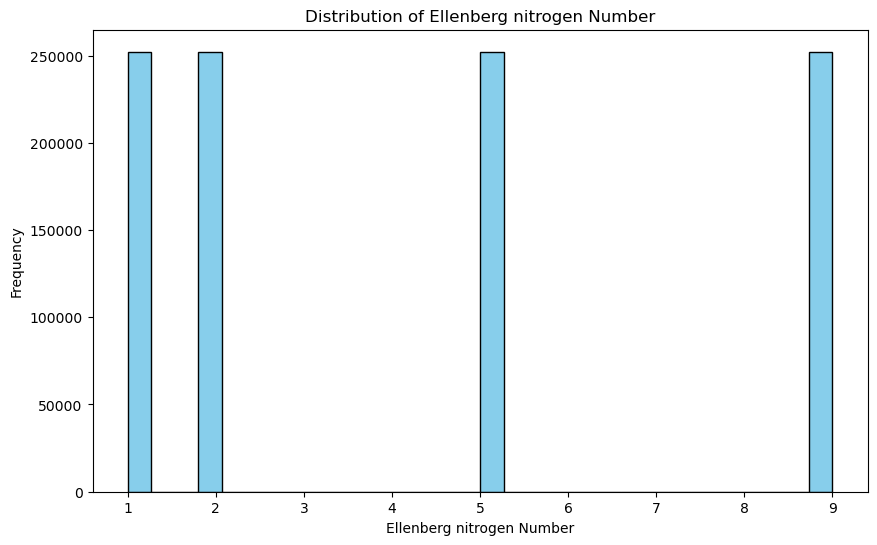

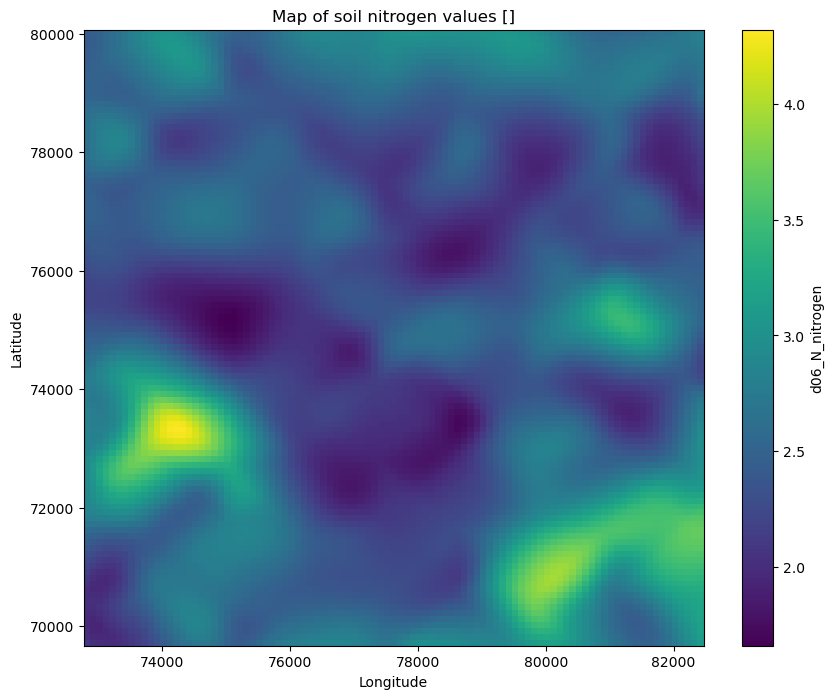

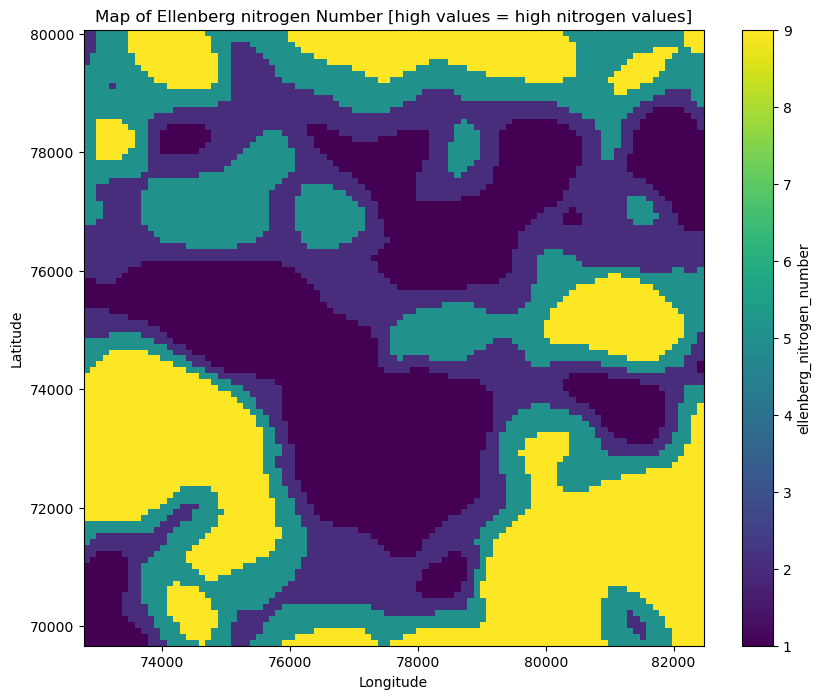

In [98]:
## Updaten Ellenberg values

# nitrogen value (ph)

ds = cube_06_N
nitrogen_number = ds.d06_N_nitrogen.sel(band=1)

# Compute statistics
max_value = nitrogen_number.max().item()    # Maximum
min_value = nitrogen_number.min().item()    # Minimum
mean_value = nitrogen_number.mean().item()  # Mean
std_value = nitrogen_number.std().item()    # Standard deviation

# Compute quantiles
quantiles = nitrogen_number.quantile([0.25, 0.5, 0.75], dim=None)  # 25th, 50th (median), 75th percentiles

# Convert xarray.DataArray to simple Python scalars
quantile_25 = quantiles.sel(quantile=0.25).item()
quantile_50 = quantiles.sel(quantile=0.5).item()  # Median
quantile_75 = quantiles.sel(quantile=0.75).item()

# Print statistics
print(f"Max value: {max_value}")
print(f"Min value: {min_value}")
print(f"Mean value: {mean_value}")
print(f"Standard deviation: {std_value}")

# Print quantile values
print(f"25th percentile (Q1): {quantile_25}")
print(f"50th percentile (Median): {quantile_50}")
print(f"75th percentile (Q3): {quantile_75}")

#######################################

# Applying the if-then query  0=light 1= dark raster pixel values
# Manualy classification of shadow values into ellenberg light-classes:

new_data =          xr.where(ds['d06_N_nitrogen'] > quantile_75, 9,  #
                    xr.where(ds['d06_N_nitrogen'] > quantile_50, 5,  #
                    xr.where(ds['d06_N_nitrogen'] > quantile_25, 2,  # 
  
                             1)))

# Adding the result back to the dataset (optional)
cube_06_N['ellenberg_nitrogen_number'] = new_data
#print (cube_05_R)


## Plot results:
# Flatten the data array (remove NaNs if necessary)
nitrogen_data = cube_06_N['ellenberg_nitrogen_number'].values.flatten()
# Remove NaN values if they exist
nitrogen_data = nitrogen_data[~np.isnan(nitrogen_data)]
# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(nitrogen_data, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ellenberg nitrogen Number')
plt.xlabel('Ellenberg nitrogen Number')
plt.ylabel('Frequency')
# Show the plot
plt.show()


# MAP raw ph DATA
#cube_05_R['ellenberg_nitrogen_number'] 

# Plot the ellenberg_light_number data from cube
plt.figure(figsize=(10, 8))
cube_06_N['d06_N_nitrogen'].plot(cmap='viridis')  # You can change the colormap if needed
#cube_05_R['ellenberg_nitrogen_number'].plot(cmap='viridis')  # You can change the colormap if needed
# Add title and labels
plt.title('Map of soil nitrogen values []')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
# Show the plot
plt.show()


# MAP ellenberge number DATA
#cube_05_R['ellenberg_nitrogen_number'] 
# Plot the ellenberg_light_number data from cube
plt.figure(figsize=(10, 8))
cube_06_N['ellenberg_nitrogen_number'].plot(cmap='viridis')  # You can change the colormap if needed
# Add title and labels
plt.title('Map of Ellenberg nitrogen Number [high values = high nitrogen values]')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.show()



#### (2.1.7) Salzzahl (S-Zahl)

- Wert	Benennung	Erläuterung
- 0	nicht salzertragend	nur auf Böden ohne Salz (die Zahl „0“ ist bei Berechnungen mit zu verwenden!)
- 1	salzertragend	meist auf salzarmen bis salzfreien Böden, gelegentlich auf leicht salzhaltigen Böden (0–0,1 % Cl−)
- 2	oligohalin (I)	öfter auf Böden mit sehr geringem Chloridgehalt (0,05–0,3 % Cl−)
- 3	β-mesohalin (II)	meist auf Böden mit geringem Chloridgehalt (0,3–0,5 % Cl−)
- 4	α/β-mesohalin (II/III)	meist auf Böden mit geringem bis mäßigen Chloridgehalt (0,5–0,7 % Cl−)
- 5	α-mesohalin (III)	meist auf Böden mit mäßigem Chloridgehalt (0,7–0,9 % Cl−)
- 6	α-meso-/polyhalin (III/IV)	auf Böden mit mäßigem bis hohem Chloridgehalt (0,9–1,2 % Cl−)
- 7	polyhalin (IV)	auf Böden mit hohem Chloridgehalt (1,2–1,6 % Cl−)
- 8	euhalin (IV/V und V)	auf Böden mit sehr hohem Chloridgehalt (> 1,6–2,3 % Cl−)
- 9	euhalin bis hypersalin (V/VI)	auf Böden mit sehr hohem, in Trockenzeiten extremem Salzgehalt (> 2,3 % Cl−)

#### (2.1.8) Schwermetallresistenz

- Wert	Benennung	Erläuterung
- b	mäßig schwermetallresistent	…
- B	ausgesprochen schwermetallresistent	…

#### (2.1.9) Lebensform

- Wert	Benennung	Erläuterung: Lage der Überwinterungsorgane zur Erdoberfläche
- A	Hydrophyt	aquatisch lebende Pflanze, Überwinterungsknospen normalerweise unter Wasser
- C	krautiger Chamaephyt	Knospen wie bei Z meist über der Erde und im Schneeschutz überwinternd
- H	Hemikryptophyt	Überwinterungsknospen nahe der Erdoberfläche
- T	Therophyt	kurzlebig und ungünstige Zeiten als Samen überdauernd
- G	Geophyt	Überwinterungsknospen unter der Erdoberfläche meist mit Speicherorganen
- Z (z)	holziger Chamaephyt	Zwergstrauch, nur selten über 0,5 m hoch werdend (Angabe „z“ wenn zweijährig)
- N (n)	Nanophanerophyt	Strauch oder Kleinbaum, meist 0,5–5 m hoch werdend (Angabe „n“ wenn zweijährig)
- P	Phanerophyt	Baum, der mehr als 5 m hoch werden kann
- li	Liane oder Spreizklimmer	sich auf andere Pflanzen stützend, aber im Boden wurzelnd
- ep	Epiphyt	auf anderen Pflanzen nicht parasitisch als „Aufsitzer“ lebend
- hp	Halbparasit	auf lebenden Pflanzen schmarotzend, aber mit grünen Blättern
- vp	Vollparasit	wie hp, aber ohne Blattgrün


#### (2.1.10) Blattausdauer

- Wert	Benennung	Erläuterung
- I	immergrün	zu allen Jahreszeiten mit Blättern, die oft länger als ein Jahr leben
- W	überwinternd grün	oft mit grünen Blättern überwinternd, die aber meist im Frühjahr ersetzt werden
- S	sommergrün	nur in der wärmeren Jahreszeit mit grünen Blättern
- V	vorsommergrün	vom Vorfrühling bis zum Frühsommer grün, dann aber meist einziehend

### (2.2) Testing cubes

#### (2.2.1) Merging the single parameter-cubes

In [ ]:
## Merge datasets:
combined_array = xr.merge([cube_01, cube_02,cube_03, cube_04,cube_05 ,cube_06 ])

In [ ]:
SELECT 

In [9]:
#combined_array = cube_01

combined_array.d01_light_number.sel(band=1).plot()
#combined_array.d07_population_2021_1km.sel(band=1).plot()


##a ad info




NameError: name 'combined_array' is not defined

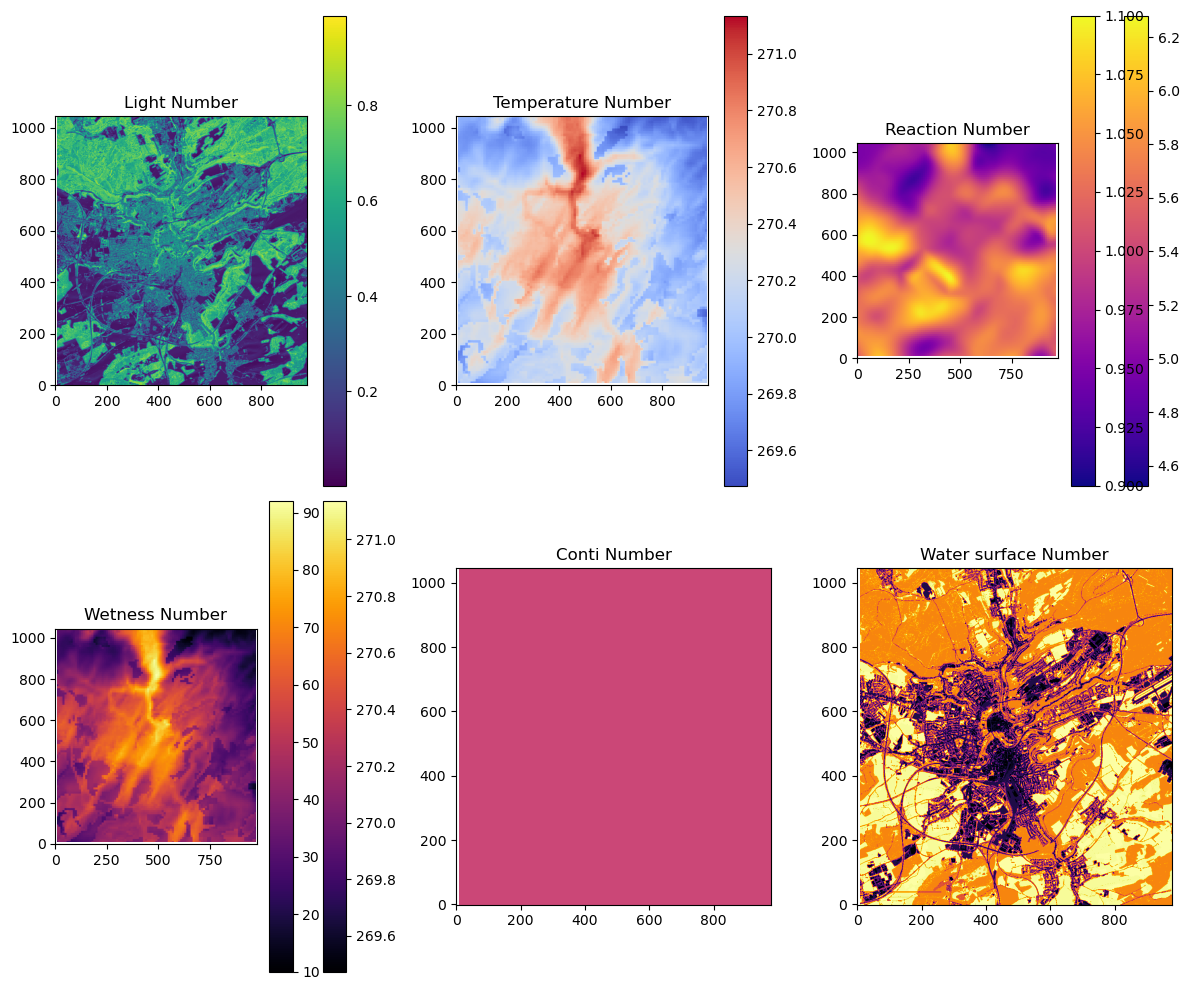

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming p1, p2, p3, and p4 are 2D numpy arrays
p1 = combined_array.d01_light_number.sel(band=1).astype(np.float32)
p2 = combined_array.d02_temperatur_number.sel(band=1).astype(np.float32)
p3 = combined_array.d03_nitrogen_number.sel(band=1).astype(np.float32)
p4 = combined_array.d04_wetness_number.sel(band=1).astype(np.float32)
p5 = combined_array.d05_conti_number.sel(band=1).astype(np.float32)
p6 = combined_array.d06_watersurface.sel(band=1).astype(np.float32)


# Create a figure with four subplots in a 2x2 grid
fig, axes = plt.subplots(2, 3, figsize=(12, 10))

# Flatten the axes array to easily access individual subplots
axes = axes.flatten()

# Plot p1
im1 = axes[0].imshow(p1, cmap='viridis', origin='lower')
axes[0].set_title('Light Number')
plt.colorbar(im1, ax=axes[0], orientation='vertical')

# Plot p2
im2 = axes[1].imshow(p2, cmap='coolwarm', origin='lower')
axes[1].set_title('Temperature Number')
plt.colorbar(im2, ax=axes[1], orientation='vertical')

# Plot p3
im3 = axes[2].imshow(p3, cmap='plasma', origin='lower')
axes[2].set_title('nitrogen Number')
plt.colorbar(im3, ax=axes[2], orientation='vertical')

# Plot p4
im4 = axes[3].imshow(p4, cmap='inferno', origin='lower')
axes[3].set_title('Wetness Number')
plt.colorbar(im4, ax=axes[3], orientation='vertical')

# Plot p5
im3 = axes[4].imshow(p5, cmap='plasma', origin='lower')
axes[4].set_title('Conti Number')
plt.colorbar(im3, ax=axes[2], orientation='vertical')

# Plot p6
im4 = axes[5].imshow(p6, cmap='inferno', origin='lower')
axes[5].set_title('Water surface Number')
plt.colorbar(im4, ax=axes[3], orientation='vertical')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#ddd
